# Assignment 1 - Data Stewardship

## Deadline:  November 14, 23:59,  [y.he2@uva.nl](mailto:y.he2@uva.nl)
## Upload your notebook file on Canvas

## Notebook made by  

|**Name** | **Student id** | **email**|
|:- |:-|:-|
|narendra parigi | 12089265 | naren.parigi@gmail.com|
|  | |. |

 We (enlisted above) declare that:
1. Our assignment will be our own work.
2. We shall not make solutions to the assignment available to anyone else.
3. We shall not engage in any other activities that will dishonestly improve my results or dishonestly improve or hurt the results of others.

Note: your notebook should give no errors when executed as "Run All" cells

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
%matplotlib inline

In [61]:
churn= pd.read_csv('churn3.txt')

In [62]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 21 columns):
State             3229 non-null object
Account Length    3229 non-null int64
Area Code         3229 non-null int64
Phone             3229 non-null object
Int'l Plan        3229 non-null object
VMail Plan        3229 non-null object
VMail Message     3229 non-null int64
Day Mins          3229 non-null float64
Day Calls         3229 non-null int64
Day Charge        3229 non-null float64
Eve Mins          3229 non-null float64
Eve Calls         3229 non-null int64
Eve Charge        3229 non-null float64
Night Mins        3219 non-null object
Night Calls       3229 non-null int64
Night Charge      3229 non-null float64
Intl Mins         3229 non-null float64
Intl Calls        3229 non-null int64
Intl Charge       3229 non-null float64
CustServ Calls    3229 non-null int64
Churn?            3229 non-null object
dtypes: float64(7), int64(8), object(6)
memory usage: 529.8+ KB


# Question 1
Explore whether there are missing values for any of the variables. Determine the number of observations in the sample.

1a. number of observations in the sample

In [63]:
print ("number of observations in the sample {0}".format(churn.shape[0]))

number of observations in the sample 3229


1b. missing values for any of the variables

In [64]:
churn.columns[churn.isnull().any() | churn.isna().any()]

Index(['Night Mins'], dtype='object')

In [65]:
print("% of NaN values in DataFrame churn")
((churn.isna() | churn.isnull()).sum()/churn.shape[0])*100

% of NaN values in DataFrame churn


State             0.000000
Account Length    0.000000
Area Code         0.000000
Phone             0.000000
Int'l Plan        0.000000
VMail Plan        0.000000
VMail Message     0.000000
Day Mins          0.000000
Day Calls         0.000000
Day Charge        0.000000
Eve Mins          0.000000
Eve Calls         0.000000
Eve Charge        0.000000
Night Mins        0.309693
Night Calls       0.000000
Night Charge      0.000000
Intl Mins         0.000000
Intl Calls        0.000000
Intl Charge       0.000000
CustServ Calls    0.000000
Churn?            0.000000
dtype: float64

# Question 2
Create a pivot table which shows the number of observations with 'State'-values vertical and 'Area Code'-values horizontal. See also: [pbpython.com/pandas-pivot-table-explained.html](http://pbpython.com/pandas-pivot-table-explained.html)

In [66]:
pd.pivot_table(churn[['State','Area Code']], index='State')

,Area Code
State,
AK,440.428571
AL,429.620253
AR,438.377358
AZ,433.950000
CA,442.303030
CO,430.903226
CT,429.608108
DC,435.038462
DE,440.516667


# Question 3
Use a histogram to determine visually whether there are any outliers among the number of *calls to customer service*, i.e. column $\texttt{'CustServ Calls'}$.

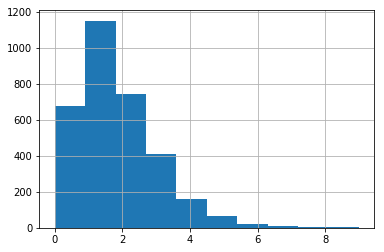

In [102]:
churn['CustServ Calls'].hist(bins=10)

Based on the histogram plot, we can state that the dataset (calls to customer service) is right skewed.

# Question 4
Identify how many *customer service calls*, i.e. column $\texttt{'CustServ Calls'}$, should be considered outliers, using:
* a. The Z-score method, and
* b. The IQR method.

In [91]:
churn['CustServ Calls'].describe()

count    3229.000000
mean        1.558377
std         1.313386
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustServ Calls, dtype: float64

4a.number of outliers based on z-score

To use z-score data need to be normally distributed.

The empirical rule is, any z-score greater than 3 or less than -3 is considered to be an outlier.

In [103]:
def zscore(mean, std, datapoint):
    """ derives z-score for a datapoint.
    """
    return (datapoint - mean)/std 
    
def outlier_z_score(df, column):
    """derives z-score for the column in dataframe. 
    """
    mean = df[column].mean()
    std = df[column].std()
    new_column = 'Z Score ' + column
    df[new_column] = df[column].apply(lambda x: zscore(mean, std, x))
    
    return df 

In [104]:
churn = outlier_z_score(churn, 'CustServ Calls')

In [144]:
print('number of outliers based on z-score: {}'
      .format(churn[['CustServ Calls']][abs(churn['Z Score CustServ Calls']) > 3].shape[0]))

number of outliers based on z-score: 35


4b.number of outliers based on interquartile

Outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.

In [141]:
def outlier_quantile(df, column):
    """ flags outlier based on the interquartile range for the column in dataframe. 
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    new_column = 'Outlier Flag ' + column
    df[new_column] = df[column].apply(lambda x: 0 if ((x > low) & (x < high)) else 1)
    return df

In [142]:
churn = outlier_quantile(churn, 'CustServ Calls')

In [143]:
print('number of outliers based on interquartile range: {}'
      .format(churn['CustServ Calls'][churn['Outlier Flag CustServ Calls'] == 1].shape[0]))

number of outliers based on interquartile range: 256


# Question 5
Estimate the skewness as follows:
* a. Calculate the skewness of *day minutes*, i.e. column $\texttt{'Day Mins'}$, based on $\text{Skewness}=3\frac{(\text{mean}-\text{median})}{\text{standard deviation}}$.
* b. Then calculate the skewness of the Z-score standardized *day minutes*. Comment.
* c. Based on the skewness value, would you consider *day minutes* to be skewed or nearly
perfectly symmetric?

# Question 6
Work with *international minutes*, i.e. column $\texttt{'Intl Mins'}$, as follows.
* a. Construct a normal probability plot of *international minutes*. [Hint: use stats.probplot.]
* b. What is stopping this variable from being normally distributed?
* c. Construct a flag variable to deal with the situation in (b).
* d. Construct a normal probability plot of the derived variable *nonzero international minutes*. Comment on the normality.